In [84]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        break
        

## Import Libraries

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , auc , accuracy_score

import tensorflow as tf
from tensorflow import keras

from PIL import Image
import cv2
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout,Conv2D, Flatten,MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Resizing, Rescaling
from tensorflow.keras.layers import RandomContrast, RandomFlip, RandomZoom, RandomRotation

import warnings
warnings.filterwarnings('ignore')

In [86]:
#path = "/kaggle/input/plant-disease-recognition-dataset/Train/Train"
path = "D:\Deep Learning Project"
train = image_dataset_from_directory(path, batch_size=32,
                                    image_size=(256,256),shuffle=True)

Found 1532 files belonging to 3 classes.


In [87]:
path = "D:\Deep Learning Project"
test = image_dataset_from_directory(path, batch_size=32,
                                    image_size=(256,256),shuffle=True)

Found 1532 files belonging to 3 classes.


In [88]:
path = "D:\Deep Learning Project"
valid = image_dataset_from_directory(path, batch_size=32,
                                    image_size=(256,256),shuffle=True)

Found 1532 files belonging to 3 classes.


In [89]:
class_labels = train.class_names
class_labels

['Test', 'Train', 'Validation']

In [90]:
print(len(train))
print(len(test))
print(len(valid))

48
48
48


## Data Preprocessing

In [91]:
for image_batch,image_label in train.take(1):
    print(image_batch[0])
    print(class_labels[image_label[0].numpy()])

tf.Tensor(
[[[113.0625   167.0625    79.6875  ]
  [116.34766  170.34766   84.34766 ]
  [116.59766  170.59766   86.59766 ]
  ...
  [207.1582   234.1582   199.1582  ]
  [204.28125  233.28125  202.28125 ]
  [201.13086  231.13086  203.13086 ]]

 [[116.15625  170.15625   84.46875 ]
  [114.4375   168.4375    82.75    ]
  [111.55469  165.55469   81.55469 ]
  ...
  [195.30078  230.01367  186.10742 ]
  [193.09375  227.74023  189.875   ]
  [179.54883  218.01758  176.54883 ]]

 [[110.6582   164.6582    80.6582  ]
  [114.1875   168.1875    84.1875  ]
  [117.353516 171.35352   87.353516]
  ...
  [163.88477  203.88477  142.08203 ]
  [149.71289  190.71289  133.52539 ]
  [137.52539  176.93164  124.33789 ]]

 ...

 [[ 73.97461  117.97461   68.97461 ]
  [ 89.40625  126.40625   82.40625 ]
  [115.259766 147.25977  106.259766]
  ...
  [182.57227  209.57227  140.57227 ]
  [172.40625  199.40625  130.40625 ]
  [168.2793   196.2793   122.2793  ]]

 [[ 62.220703 108.5332    59.376953]
  [ 90.802734 126.958984  

## Train Image Data

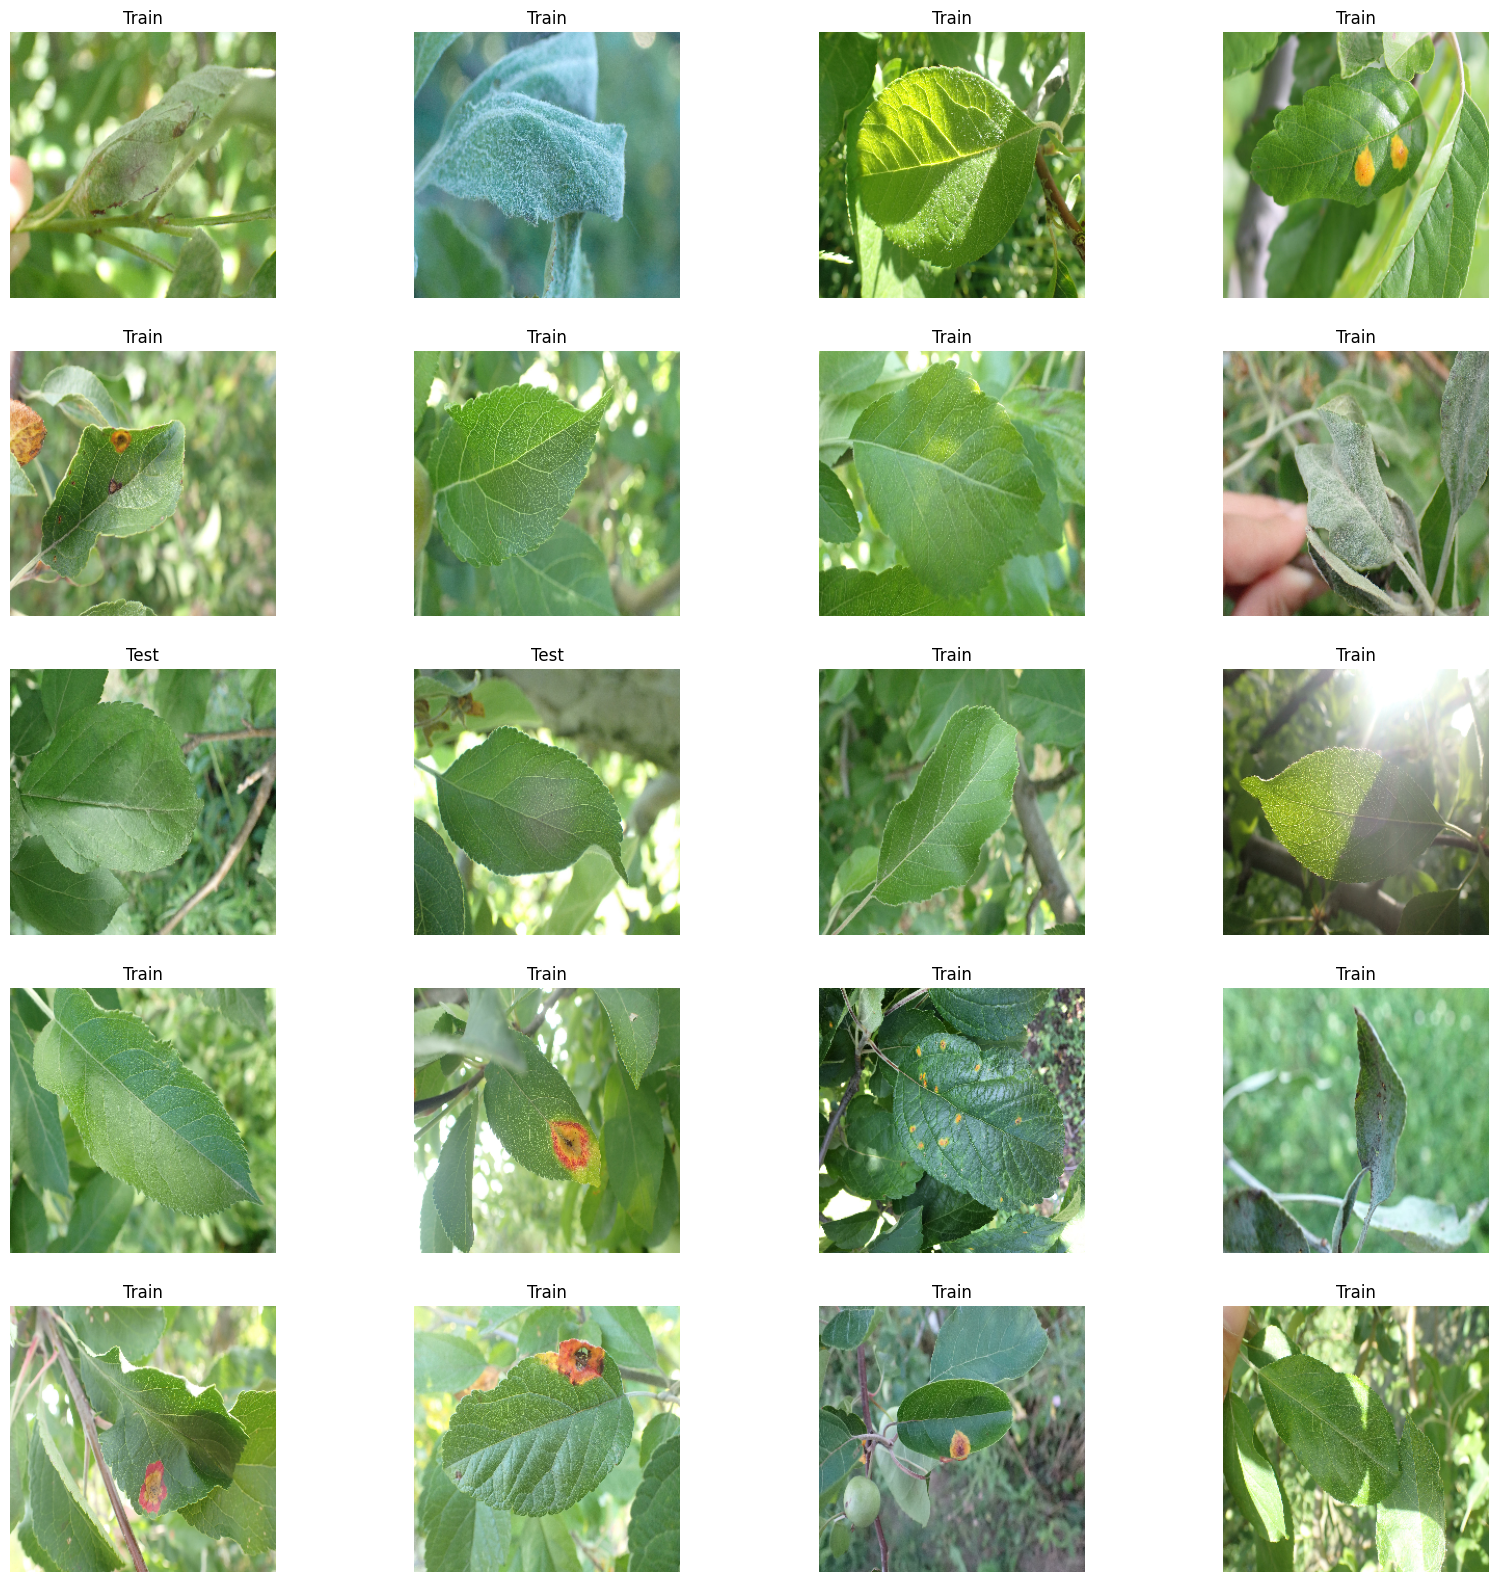

In [92]:
plt.figure(figsize=(20,20))
for image_batch , image_label in train.take(1):
    for i in range(20):
        plt.subplot(5,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_labels[image_label[i].numpy()])
        plt.axis("off")

## Resizing and Rescaling Images

In [93]:
resizing_and_rescaling = tf.keras.Sequential([
    Resizing(256, 256),
    Rescaling(1.0 / 255)
])

## Data Augmentation

In [94]:

data_augmentation = tf.keras.Sequential([
    RandomContrast(0.3),
    RandomFlip('horizontal_and_vertical'),
    RandomZoom(0.3),
    RandomRotation(0.2)
])

## Creat CNN Model 

In [95]:
IMAGE_SIZE=256
CHANNELS=3
BATCH_SIZE=32
EPOCHS=10

input_shape=(BATCH_SIZE , IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model= tf.keras.models.Sequential([
  resizing_and_rescaling,
  data_augmentation,
  # Convolution layer 1
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),padding='valid',activation='relu',input_shape=input_shape),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
  # Convolution layer 2
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
  # Convolution layer 3  
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
  # Convolution layer 4  
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Flatten Layers
  tf.keras.layers.Flatten(),

  # Dense layers
  tf.keras.layers.Dense(units=500,activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(units=500,activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(units=100,activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units=3,activation='softmax')

])

model.build(input_shape=input_shape)

In [96]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 12544)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 500)              │     6,272,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 500)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 500)              │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (32, 500)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 100)              │        50,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (32, 100)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 3)                │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,685,979 (25.50 MB)

 Trainable params: 6,685,979 (25.50 MB)

 Non-trainable params: 0 (0.00 B)

In [97]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

history = model.fit(train ,  batch_size=32 ,epochs=10,
                verbose=1,
                validation_data=valid) # epochs=10

Epoch 1/10


48/48 ━━━━━━━━━━━━━━━━━━━━ 214s 4s/step - accuracy: 0.8172 - loss: 0.6969 - val_accuracy: 0.8629 - val_loss: 0.4853
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 223s 5s/step - accuracy: 0.8623 - loss: 0.5166 - val_accuracy: 0.8629 - val_loss: 0.4826
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 224s 5s/step - accuracy: 0.8677 - loss: 0.5024 - val_accuracy: 0.8629 - val_loss: 0.4919
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 227s 5s/step - accuracy: 0.8606 - loss: 0.4992 - val_accuracy: 0.8629 - val_loss: 0.5035
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 223s 5s/step - accuracy: 0.8594 - loss: 0.5191 - val_accuracy: 0.8629 - val_loss: 0.4811
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 223s 5s/step - accuracy: 0.8681 - loss: 0.4947 - val_accuracy: 0.8629 - val_loss: 0.4878
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 226s 5s/step - accuracy: 0.8590 - loss: 0.5083 - val_accuracy: 0.8629 - val_loss: 0.4808
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 224s 5s/step - accuracy: 0.8655 - loss: 0.5028 - val_accuracy: 0.8629 - val_loss: 0.

## Accuracy and loss on Train and Test

In [98]:
loss,acc = model.evaluate(train)
print("Loss on Train data:",loss)
print("Accuracy on Train data:",acc)

loss1,acc1 = model.evaluate(test)

print("Loss on Test data:",loss1)
print("Accuracy on Test data:",acc1)

48/48 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8682 - loss: 0.4717
Loss on Train data: 0.48240363597869873
Accuracy on Train data: 0.8629242777824402
48/48 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.8518 - loss: 0.5175
Loss on Test data: 0.48240354657173157
Accuracy on Test data: 0.8629242777824402


In [99]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

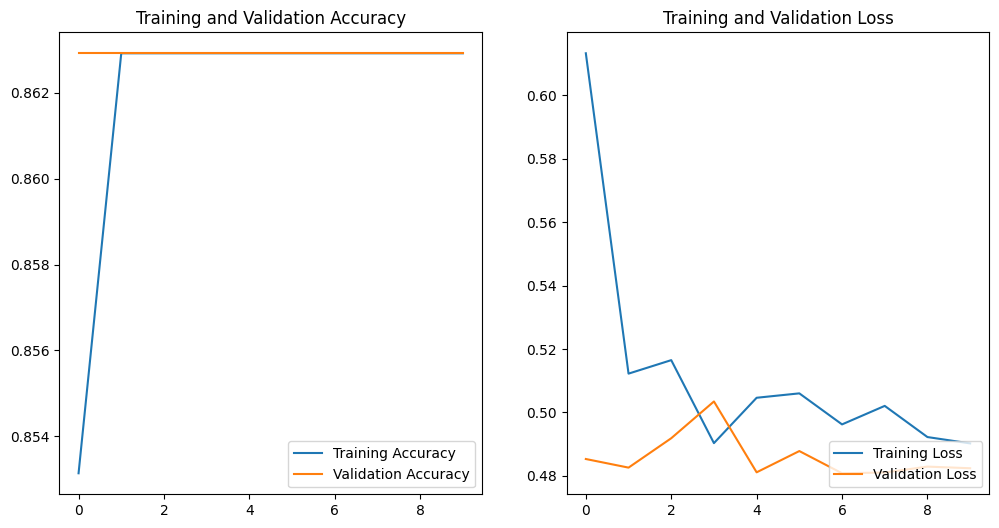

In [100]:
EPOCHS=10
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

#plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label="Training Loss")
plt.plot(range(EPOCHS),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

## Image Predictions on Test Data

In [101]:
def Prediction(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array((images[i].numpy()))
    img_array = tf.expand_dims(img_array,0)     # create a batch

    predictions = model.predict(img_array)

    predicted_class = class_labels[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    
    return predicted_class , confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


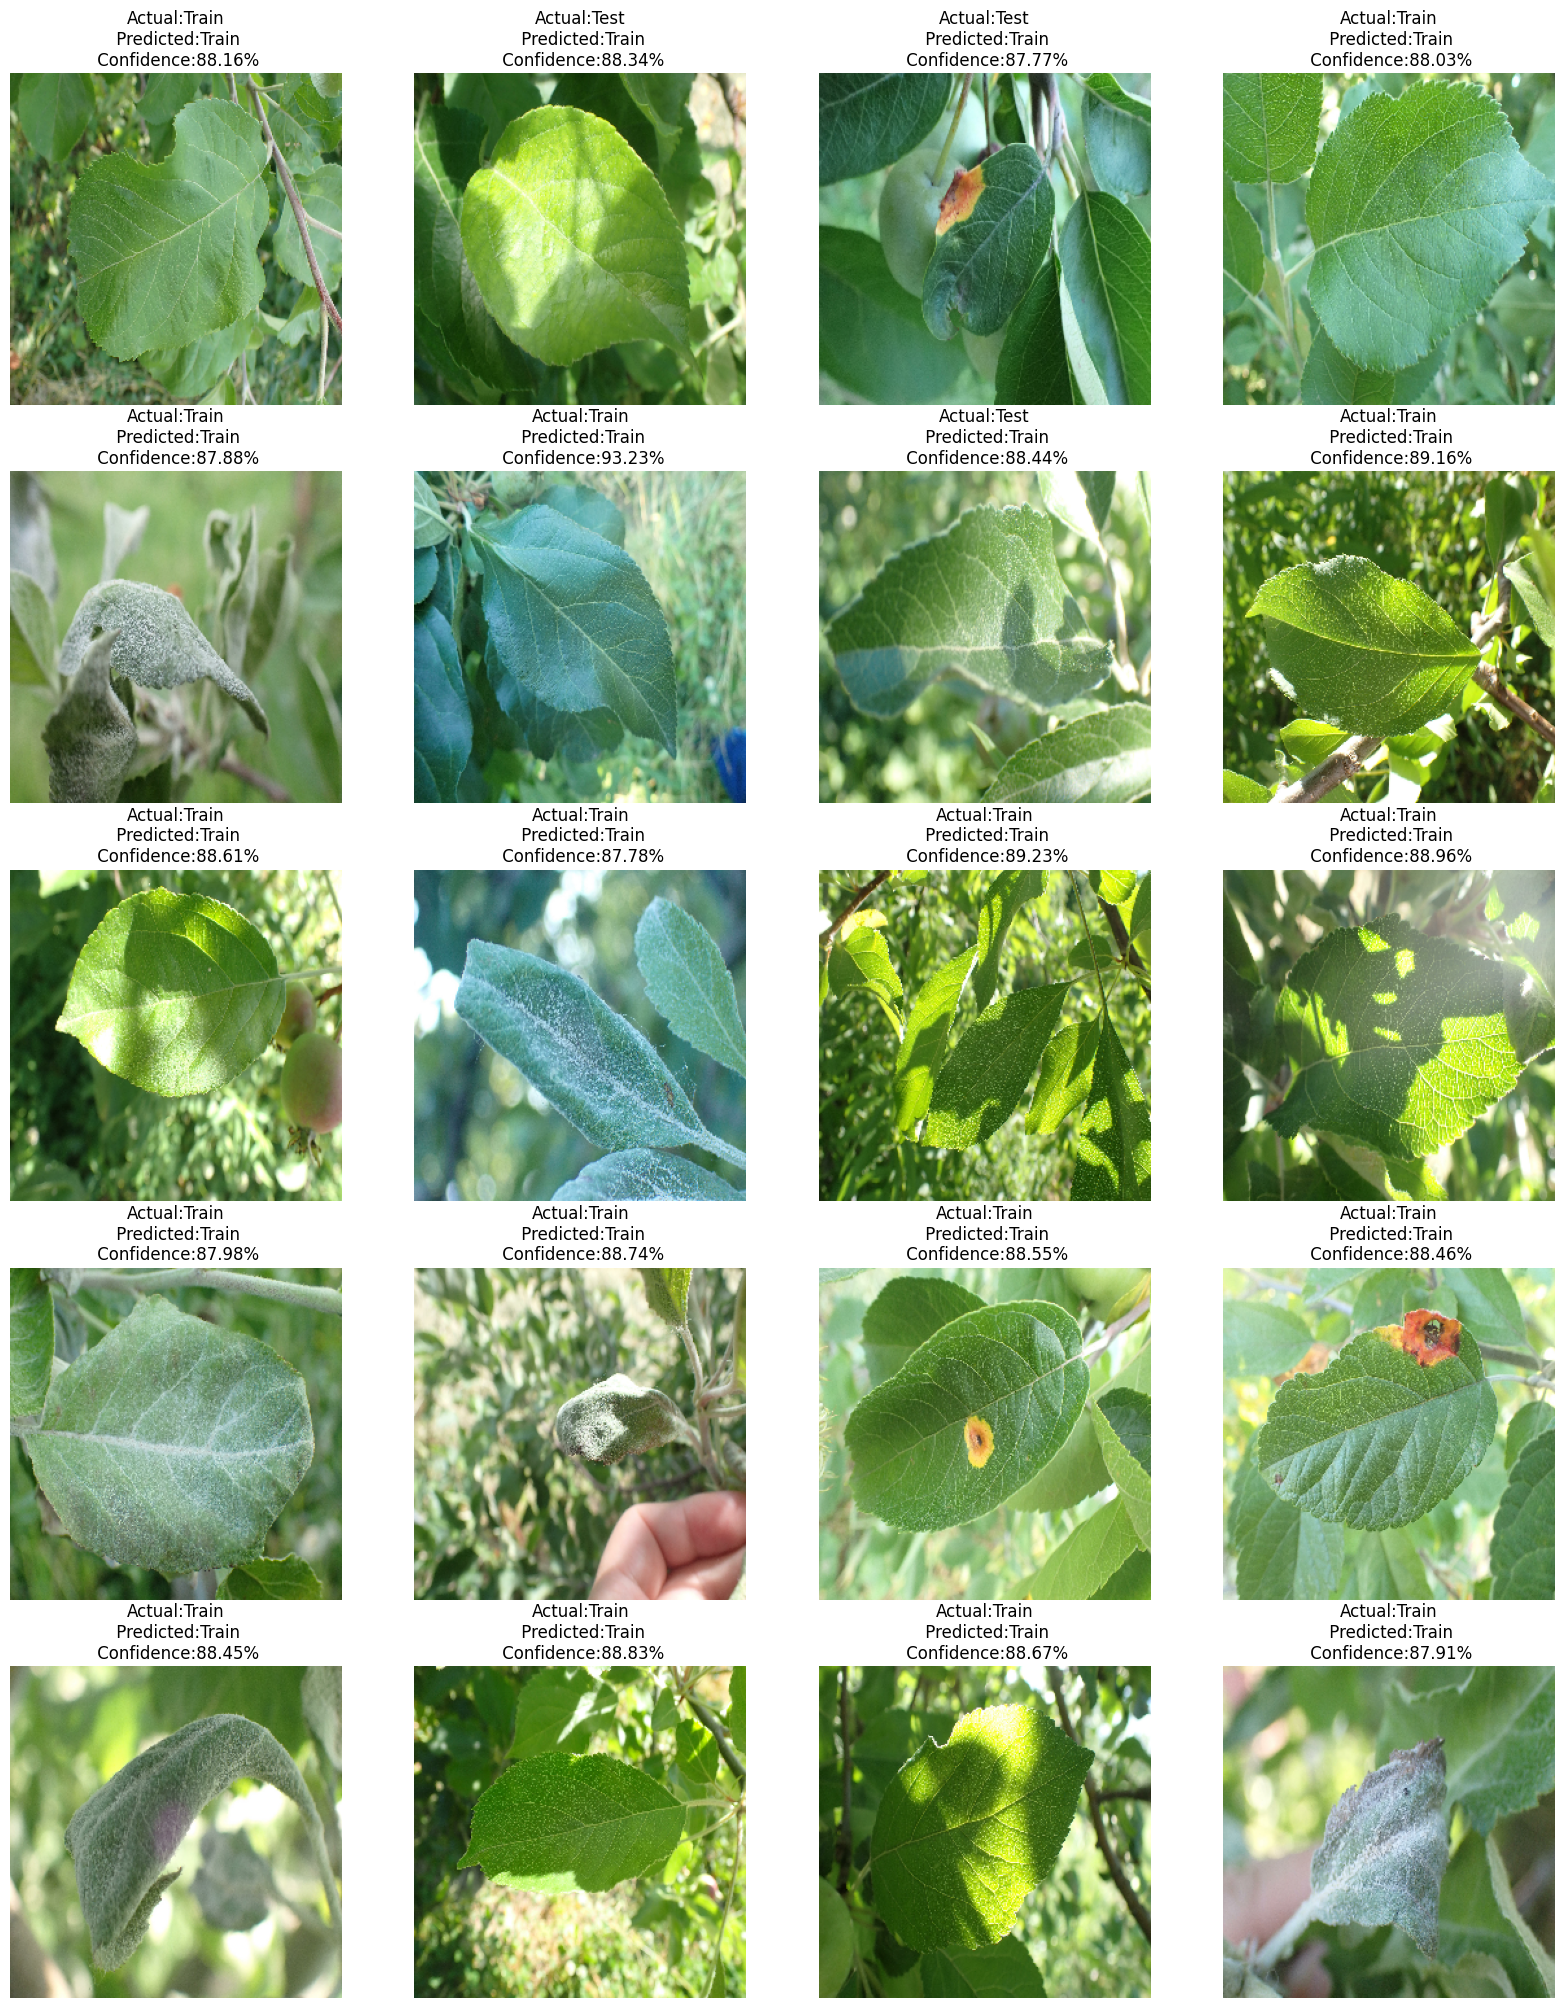

In [102]:
plt.figure(figsize=(20,25))
for images , labels in test.take(1):
    for i in range(20):
        ax = plt.subplot(5,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        #plt.title(class_labels[labels[i]])


        predicted_class , confidence = Prediction(model,images[i].numpy())
        actual_class = class_labels[labels[i]]
        plt.title(f"Actual:{actual_class}\n Predicted:{predicted_class}\n Confidence:{confidence}%")
        plt.axis("off")

In [104]:
model.save('D:\Deep Learning Project.keras')

In [106]:
# Save the model in the TensorFlow SavedModel format
model.export('D:\Deep Learning Project')


INFO:tensorflow:Assets written to: D:\Deep Learning Project\assets


INFO:tensorflow:Assets written to: D:\Deep Learning Project\assets


Saved artifact at 'D:\Deep Learning Project'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2281606268000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2281606271344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2281606271168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2281606272928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2281611621680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2281611615520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2281611623616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2281611612880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2281611621328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2281611608304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2281611608128: TensorSpec(

In [ ]:
# Load the model in the TensorFlow SavedModel format
#loaded_model = tf.keras.models.load_model('path/to/save/your_model')